## 1. Import needed librairies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Input the data

In [3]:
data = pd.read_csv('youtoxic_english_1000.csv')
data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


### Check if labels are balanced

<AxesSubplot:xlabel='IsToxic', ylabel='count'>

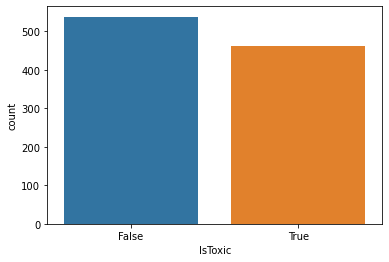

In [4]:
sns.countplot(data=data,x="IsToxic")

In [5]:
data.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,UggiR-zPsqXFt3gCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


The data is kinda balanced.
Now we have to clean the text then vectorize it!

## 3. Clean the Text Data

In [44]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     I7\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [53]:
import string
lemmatize=nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\MSI
[nltk_data]     I7\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\MSI
[nltk_data]     I7\AppData\Roaming\nltk_data...


True

In [11]:
newData = data

Remove xa0 space

In [ ]:
newData['Text'] = newData['Text'].replace(u'\xa0', u' ')

Remove white space

In [39]:
newData['Text'] = newData['Text'].str.strip()

A function that removes all punctuation, all stop words, lemmatize the words and return a tokenized list of cleaned text

In [84]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Lemmatize the words
    4. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Lemmatize the words
    nopunc = [lemmatize.lemmatize(word) for word in nopunc.split()]
    # Join the characters again to form the string.
    nopunc = ' '.join(nopunc)
    
    # Now just remove any stopwords
    return [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [60]:
text_process('Hello my name is Amal!! and i am working on this work using rocks and rock')

['Hello', 'name', 'Amal', 'working', 'work', 'using', 'rock', 'rock']

Use apply for every text in the data

In [63]:
newData['Text'].head(5).apply(text_process)

0    [people, would, take, step, back, make, case, ...
1    [Law, enforcement, trained, shoot, apprehend, ...
2    [Dont, reckon, black, life, matter, banner, he...
3    [large, number, people, like, police, officer,...
4    [Arab, dude, absolutely, right, shot, 6, extra...
Name: Text, dtype: object

## 4. Vectorizing the data

In [68]:
new_Data = []
df = pd.DataFrame(new_Data)

In [72]:
df['CommentId'] = newData['CommentId']
df['VideoId'] = newData['VideoId']
df['Text'] = newData['Text']
df['IsToxic'] = newData['IsToxic']

In [79]:
df.head()

,CommentId,VideoId,Text,IsToxic
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,Dont you reckon them 'black lives matter' bann...,True
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False


In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

4386


In [91]:
message4 = df['Text'][3]
print(message4)

There are a very large number of people who do not like police officers. They are called Criminals and its the reason we have police officers. The fact that Criminals do not like police officers is a testament to the good work that police officers do in protecting the public. When our children or our family are in danger, we do not hessitate to call for help, and we call the Police. Its about time people stopped complaining and started to give the Police some respect for the hard work and dedication that often requires them to put their lives on the line, to serve the public.


In [92]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 641)	2
  (0, 642)	1
  (0, 713)	1
  (0, 820)	1
  (0, 961)	2
  (0, 1001)	1
  (0, 1039)	1
  (0, 1430)	1
  (0, 1450)	1
  (0, 1674)	1
  (0, 1694)	1
  (0, 1781)	1
  (0, 1816)	1
  (0, 1829)	1
  (0, 2216)	1
  (0, 2277)	1
  (0, 2283)	2
  (0, 2290)	1
  (0, 2681)	1
  (0, 2707)	4
  (0, 2710)	1
  (0, 2830)	2
  (0, 2902)	6
  (0, 3027)	1
  (0, 3053)	2
  (0, 3081)	1
  (0, 3165)	1
  (0, 3246)	1
  (0, 3256)	1
  (0, 3443)	1
  (0, 3664)	1
  (0, 3711)	1
  (0, 3861)	1
  (0, 3936)	1
  (0, 4291)	2
(1, 4386)


In [94]:
print(bow_transformer.get_feature_names()[2902])
print(bow_transformer.get_feature_names()[2707])

police
officer


In [95]:
text_bow = bow_transformer.transform(df['Text'])

In [97]:
print('Shape of Sparse Matrix: ', text_bow.shape)
print('Amount of Non-Zero occurences: ', text_bow.nnz)

Shape of Sparse Matrix:  (1000, 4386)
Amount of Non-Zero occurences:  15856


Now we'll use TF-IDF to give weight to each word in the comments

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document). 

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [98]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 4291)	0.2120470967470687
  (0, 3936)	0.08369391736037236
  (0, 3861)	0.1617147922778925
  (0, 3711)	0.12564438321929247
  (0, 3664)	0.11976432641897239
  (0, 3443)	0.13363811260110242
  (0, 3256)	0.11511075341292093
  (0, 3246)	0.15262758723850595
  (0, 3165)	0.10901622794005865
  (0, 3081)	0.10338381791641837
  (0, 3053)	0.23620686595889043
  (0, 3027)	0.1411790628409497
  (0, 2902)	0.41530956114947426
  (0, 2830)	0.12173186855109545
  (0, 2710)	0.14618011265623532
  (0, 2707)	0.32686048257534106
  (0, 2681)	0.12564438321929247
  (0, 2290)	0.13064543303457812
  (0, 2283)	0.14104111419376966
  (0, 2277)	0.08869496717565799
  (0, 2216)	0.14618011265623532
  (0, 1829)	0.1617147922778925
  (0, 1816)	0.12564438321929247
  (0, 1781)	0.11810343297944521
  (0, 1694)	0.0924389507876739
  (0, 1674)	0.11247102295580497
  (0, 1450)	0.11375204619529704
  (0, 1430)	0.09348154831840144
  (0, 1039)	0.1617147922778925
  (0, 1001)	0.15262758723850595
  (0, 961)	0.3052551744770119
  (0, 820)	0.161

In [99]:
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(1000, 4386)


## 5. Training the model

Split the data! 70% for training and 30% for testing!

In [124]:
from sklearn.model_selection import train_test_split

text_train, text_test, toxic_train, toxic_test = \
train_test_split(df['Text'], df['IsToxic'], test_size=0.2)

print(len(text_train), len(text_test), len(text_train) + len(text_test))

800 200 1000


Create a pipeline

Let's use the Naive Bayes classifier to start with:

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [127]:
pipeline.fit(text_train,toxic_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002109D6AF790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [128]:
predictions = pipeline.predict(text_test)

In [129]:
print(classification_report(predictions,toxic_test))

              precision    recall  f1-score   support

       False       0.78      0.69      0.73       121
        True       0.60      0.71      0.65        79

    accuracy                           0.69       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.71      0.69      0.70       200



not really good scores!

Let's try another classifier! SVM

In [130]:
from sklearn import svm

In [131]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm.SVC()),  # train on TF-IDF vectors w/ SVM
])

In [132]:
pipeline2.fit(text_train,toxic_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002109D6AF790>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [133]:
predictions2 = pipeline2.predict(text_test)

In [134]:
print(classification_report(predictions2,toxic_test))

              precision    recall  f1-score   support

       False       0.78      0.64      0.71       129
        True       0.51      0.68      0.58        71

    accuracy                           0.66       200
   macro avg       0.65      0.66      0.64       200
weighted avg       0.69      0.66      0.66       200



A bit better but could be better haha, Let's try another one

In [122]:
from sklearn.linear_model import SGDClassifier
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SGDClassifier(loss="hinge", max_iter=100)),  # train on TF-IDF vectors w/ SGD
])
pipeline3.fit(text_train,toxic_train)
predictions3 = pipeline3.predict(text_test)
print(classification_report(predictions3,toxic_test))

              precision    recall  f1-score   support

       False       0.72      0.75      0.74       160
        True       0.70      0.67      0.69       140

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



In [125]:
from sklearn import tree
pipeline4 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', tree.DecisionTreeClassifier()),  # train on TF-IDF vectors w/ SGD
])
pipeline4.fit(text_train,toxic_train)
predictions4 = pipeline4.predict(text_test)
print(classification_report(predictions4,toxic_test))

              precision    recall  f1-score   support

       False       0.74      0.63      0.68       123
        True       0.52      0.64      0.57        77

    accuracy                           0.64       200
   macro avg       0.63      0.64      0.63       200
weighted avg       0.65      0.64      0.64       200



In [135]:
from sklearn.naive_bayes import BernoulliNB
pipeline5 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', BernoulliNB()),  # train on TF-IDF vectors w/ SGD
])
pipeline5.fit(text_train,toxic_train)
predictions5 = pipeline5.predict(text_test)
print(classification_report(predictions5,toxic_test))

              precision    recall  f1-score   support

       False       0.83      0.61      0.70       145
        True       0.39      0.67      0.50        55

    accuracy                           0.62       200
   macro avg       0.61      0.64      0.60       200
weighted avg       0.71      0.62      0.64       200

